## MSDS 432 - Programming Assignment #5 Dan Avni

## Executive Summary

The purpose of this programming assignment is to provide a "real-world" demonstration of the runtime performance of four sorting algorithms: selection sort, insertion sort, quicksort and merge sort. 

The $\Theta(n)$ and $O(n)$ notation captures the average-case and worst-case performance of that these algorithms respectively:

| Algorithm  | Average-Case $\Theta(n)$  | Worst-Case $\Omega(n)$  |
|-------------|:-------------:|-----|
| Selection Sort  |$\Theta(n^2)$ | $O(n^2)$ |   
| Insertion Sort  |$\Theta(n^2)$ | $O(n^2)$ |  
| Merge Sort      |$\Theta(nlogn)$ | $O(nlogn)$ |
| Quicksort       |$\Theta(nlogn)$ | $O(n^2)$ |

We show that in practical terms the quicksort and merge sort algorithm delivered near identical runtime performance. We also look at the worst-case perofmrance to show how the table turn and merge delivering a demonstrtable superior performance. Actual implementation considerations should include memeory and access time considerations. 

Overall, both merge sort and quicksort should be considered as good options for sorting large datasets, while selection and insertion sort are only useful for east of implementation against smaller data.

## Method and Conclusions

To demonstrate the various sort algorithm average-case performance, we prepared 1000 data elements consisting of a tuple of first name, last name, and state code selected randomly with no repetition or order.

We sort the data 25 times using each of the four algorithms and measure the mean runtime performance. We show the results in both tabular and bar chart for and confirm the therotical results. 

We repeat the excercise with the data sorted in descending order to demonstrate the worst-case performance of quicksort and mergesort.

The below chart shows the avergae case results.

<img src="./runtime2.png">

## Implementation

In [1]:
#import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import string
import random

In [2]:
# binary search implemntation retrieved from https://github.com/egonSchiele/grokking_algorithms.git
def binary_search(list, item):
  # low and high keep track of which part of the list you'll search in.
  low = 0
  high = len(list) - 1

  # While you haven't narrowed it down to one element ...
  while low <= high:
    # ... check the middle element
    mid = (low + high) // 2
    guess = list[mid]
    # Found the item.
    if guess == item:
      return mid
    # The guess was too high.
    if guess > item:
      high = mid - 1
    # The guess was too low.
    else:
      low = mid + 1

  # Item doesn't exist
  return None

In [3]:
# plain linear search implementation 
def linear_search(list, item):
  pos  = 0
  end = len(list) - 1

  # While you haven't narrowed it down to one element ...
  while pos <= end:
    current = list[pos]
    # Found the item.
    if current == item:
      return pos
    else:
      pos = pos + 1

  # Item doesn't exist
  return None

In [69]:
# plain linear search implementation 
def hash_search(set, item):
  return (item in set)

In [4]:
# merge sort implementation - coded by the author using hands on keyboard. More 

def mergeSort(array):
    l = len(array)
    # base case of one element - no work needed
    if l < 2:
        return array
    #split the array to two and sort recursively
    mid = l//2
    array1 = mergeSort(array[:mid])
    array2 = mergeSort(array[mid:])
    
    i, i1, i2, l1, l2 = 0, 0, 0, len(array1), len(array2)
    #merge the two array using one index for each sub-array
    while i < l:
        if i1 < l1 and (i2 == l2 or array1[i1] < array2[i2]):
            array[i] = array1[i1]
            i1 = i1 + 1
        else:
            array[i] = array2[i2]
            i2 = i2 + 1
        i = i1 + i2
    return array

In [7]:
# generate random data
test_data = []
for i in range(0,100000):
    test_data.append(''.join(random.choices(string.ascii_letters, k = 10)) )
    
#ensure unique values
uniq_dict = {}
for item in test_data:
    if item in uniq_dict:
        raise Exception("test_data is not unique")
    uniq_dict[item] = 'found'

In [11]:
test_data_sorted = mergeSort(test_data.copy())

In [61]:
test_data_set = {key for key in test_data}

In [63]:
search_items = [test_data[i-1] for i in [10000, 30000, 50000, 70000, 90000, 100000]]

In [70]:
search_methods = [linear_search, binary_search, hash_search]
search_methods_data = {linear_search: test_data, 
                       binary_search: test_data_sorted, 
                       hash_search: test_data_set}

#prepare an empty data frame with the desired column names
test_results_col_names = ['search_method', 'search_ms']
test_results           = pd.DataFrame(columns = test_results_col_names) 

#iterate over the possible sort methods compture runtime length in milliseconds
for i in range(0,25):
    for search_method in search_methods:
            start   = time.time()
            for search_item in search_items:
                search_method(search_methods_data[search_method], search_item)
                search_ms = (time.time() - start) * 1000
            #insert the results into a new dataframe record
            test_results.loc[len(test_results)] = [search_method.__name__, search_ms]

In [71]:
test_results_mean = test_results.groupby(['search_method'])['search_ms'].mean().to_frame()

Below is a tabular representation of the test data. It is useful as the charts fail to show the minute fluctuations in the binary search performance. To get a true read of the binary search performance we will need to run multiple tests and average the results, as well as increase the size. We should also try to execute the code in a virtualized environment where the CPU is under competition from other processes.

In [72]:
#plain text data dump of the test results
test_results_mean

,search_ms
search_method,
binary_search,0.056686
hash_search,0.014029
linear_search,34.827232


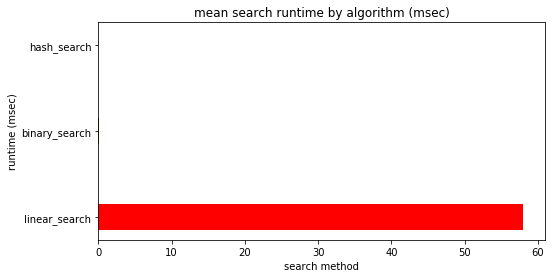

In [73]:
#plot the binary and linear search results against the data length
plt.figure(figsize=(8,4))

plt.barh(test_results.search_method, test_results.search_ms, height=0.3, color=['red', 'green', 'blue'])

plt.xlabel('search method')
plt.ylabel('runtime (msec)')
plt.title('mean search runtime by algorithm (msec)')
plt.show()